加载回测结果: forecast_results.csv
ID: K108_HQ1725113QQC8, MAE: 1.76


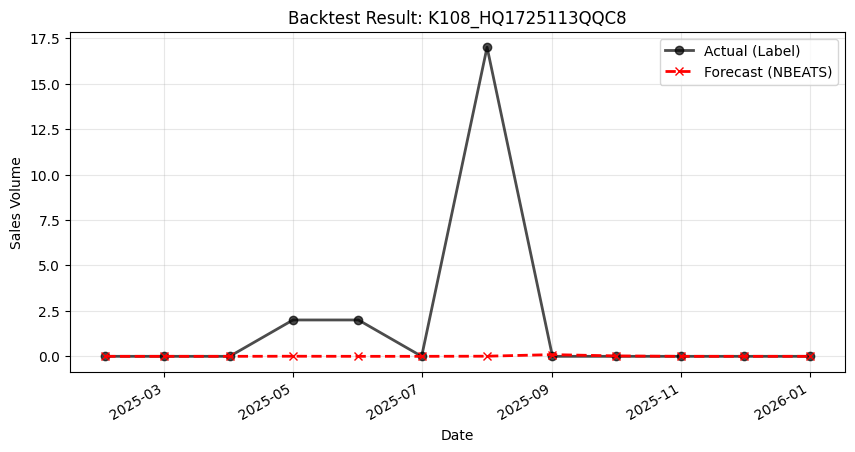

ID: 1301_130907000783A, MAE: 5.95


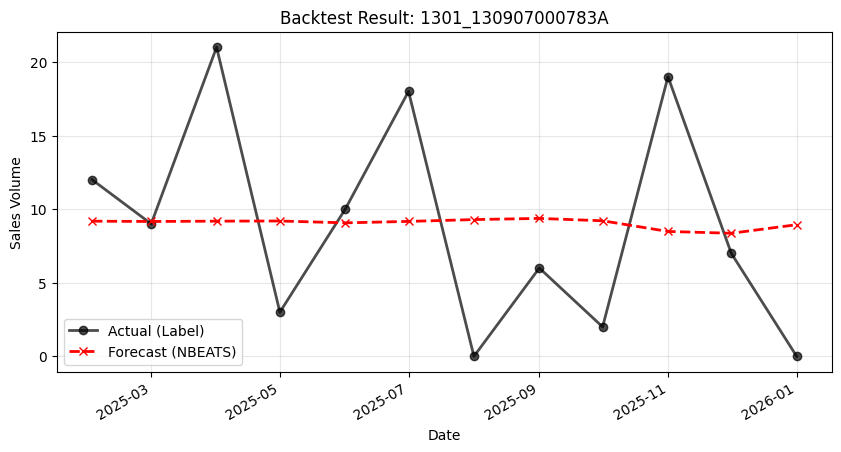

ID: 5803_A210204000019, MAE: 12.77


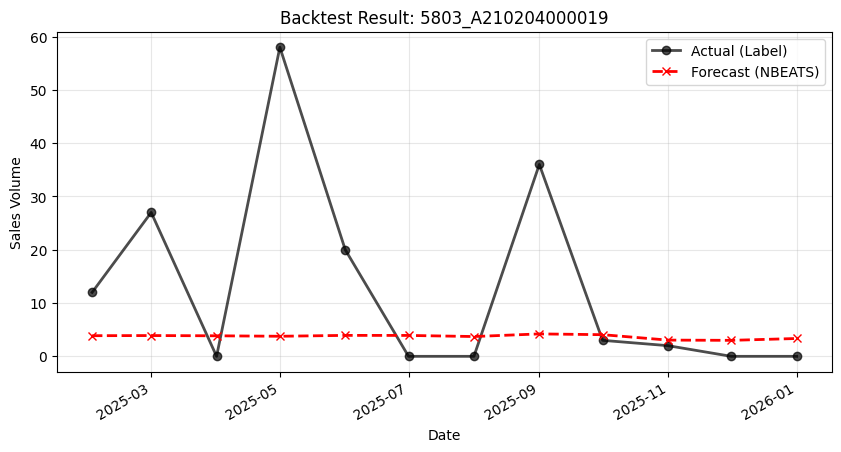

ID: 2O01_HW2O010001353, MAE: 7.28


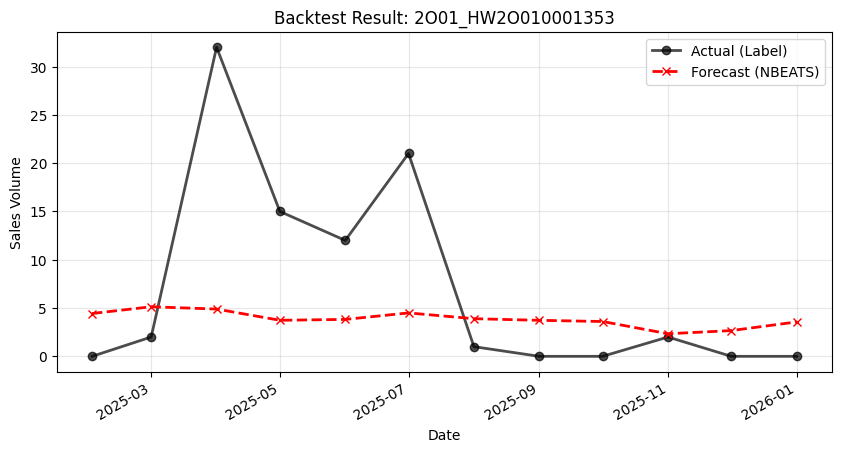

ID: 53A0_60005706, MAE: 0.42


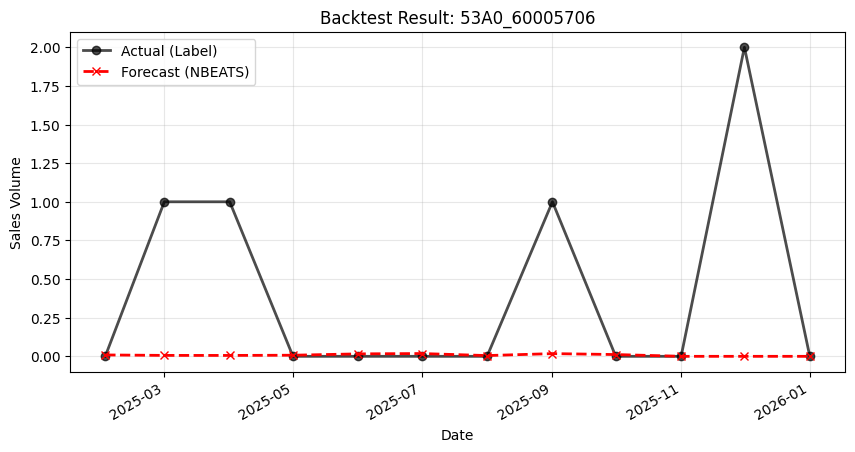

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans', 'Arial'] 
plt.rcParams['axes.unicode_minus'] = False

def plot_cv_results(cv_file, num_samples=3):
    print(f"加载回测结果: {cv_file}")
    df = pd.read_csv(cv_file)
    df['ds'] = pd.to_datetime(df['ds'])
    
    # 随机抽取 ID
    all_ids = df['unique_id'].unique()
    target_ids = random.sample(list(all_ids), min(num_samples, len(all_ids)))
    
    for uid in target_ids:
        # 取出该 ID 的数据
        sub_df = df[df['unique_id'] == uid].sort_values('ds')
        
        plt.figure(figsize=(10, 5))
        
        # 画真实值
        plt.plot(sub_df['ds'], sub_df['y'], label='Actual (Label)', 
                 color='black', marker='o', linewidth=2, alpha=0.7)
        
        pred_col_name = "NBEATS"
        # 画预测值
        if pred_col_name in sub_df.columns:
            sub_df[pred_col_name] = np.where(sub_df[pred_col_name] < 0, 0, sub_df[pred_col_name])
            plt.plot(sub_df['ds'], sub_df[pred_col_name], label=f'Forecast ({pred_col_name})', 
                     color='red', linestyle='--', marker='x', linewidth=2)
        
        plt.title(f"Backtest Result: {uid}")
        plt.xlabel("Date")
        plt.ylabel("Sales Volume")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.gcf().autofmt_xdate()
        
        # 简单打印误差
        mae = (sub_df['y'] - sub_df[pred_col_name]).abs().mean()
        print(f"ID: {uid}, MAE: {mae:.2f}")
        
        plt.show()

# 运行
plot_cv_results('forecast_results.csv', num_samples=5)